In [ ]:
import yfinance
import numpy
import matplotlib
import pandas

In [ ]:
ticker_symbol = "GC=F"
ticker = yfinance.Ticker(ticker_symbol)
historical_data = ticker.history(period="10y")

In [ ]:
df=pandas.DataFrame()
df['Close']=historical_data['Close']
df_3D=pandas.DataFrame()
df_7D=pandas.DataFrame()
df_3D['Close']=df['Close'].resample('3D').asfreq()
df_7D['Close']=df['Close'].resample('7D').asfreq()
df_3D=df_3D.dropna()
df_7D=df_7D.dropna()

In [ ]:
df_3D['MACD']=df_3D['Close'].rolling(window=30).mean()-df_3D['Close'].rolling(window=60).mean()
df_7D['MACD']=df_7D['Close'].rolling(window=30).mean()-df_7D['Close'].rolling(window=60).mean()
df_3D=df_3D.dropna()
df_7D=df_7D.dropna()

In [ ]:
df_7D_resampled=df_7D.reindex(df_3D.index, method='ffill')
df_spread=df_3D['MACD']-df_7D_resampled['MACD']

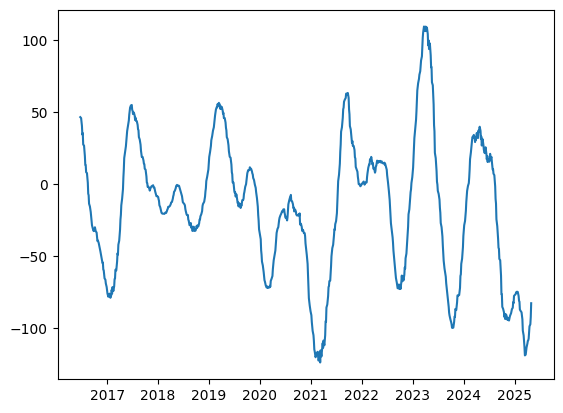

In [ ]:
matplotlib.pyplot.plot(df_spread)

In [ ]:
df=pandas.DataFrame()
df['Volume']=historical_data['Volume']

In [ ]:
df['Z_SCORE']=(df['Volume']-df['Volume'].rolling(window=200).mean())/df['Volume'].rolling(window=200).std()

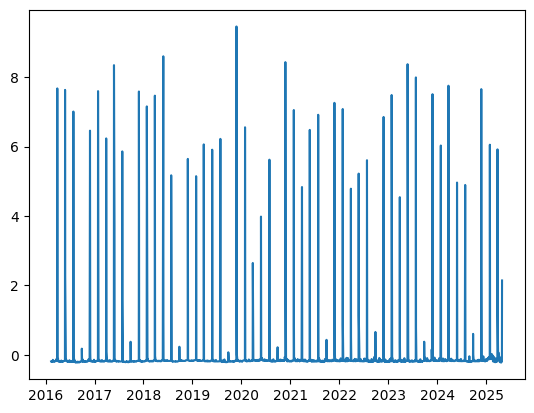

In [ ]:
matplotlib.pyplot.plot(df['Z_SCORE'])

In [ ]:
df['V_DEV']=df['Volume']/df['Volume'].rolling(window=200).mean()

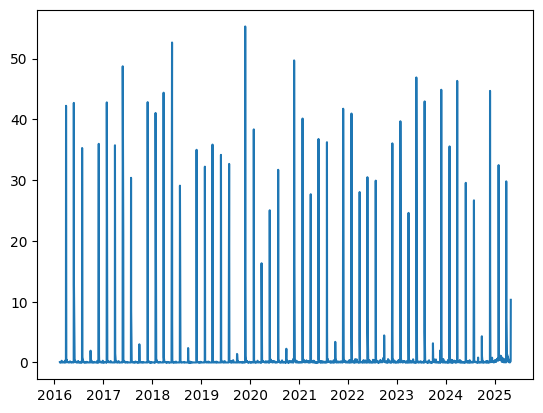

In [ ]:
matplotlib.pyplot.plot(df['V_DEV'])

In [ ]:
df=pandas.DataFrame()
df['Close']=historical_data['Close']
df['APMR']=df['Close'].diff()/df['Close'].diff().rolling(window=21).mean()

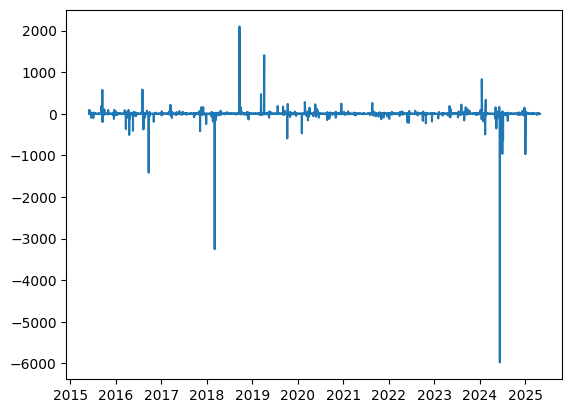

In [ ]:
matplotlib.pyplot.plot(df['APMR'])